<a href="https://colab.research.google.com/github/FAIZANSARI1200/People_Analysis/blob/main/paarsh_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder


In [ ]:
# Load the dataset
data = pd.read_csv('/content/people.csv')


In [ ]:
# 1. EDA
print(data.info())
print(data.describe())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      14999 non-null  float64
 1   lastEvaluation         14999 non-null  float64
 2   numberOfProjects       14999 non-null  int64  
 3   avgMonthlyHours        14999 non-null  int64  
 4   timeSpent.company      14999 non-null  int64  
 5   workAccident           14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotionInLast5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB
None
       satisfactoryLevel  lastEvaluation  numberOfProjects  avgMonthlyHours  \
count       14999.000000    14999.000000      14999.000000     14999.000000   
mean            0.612834        0.716102  

In [ ]:
#2. Preprocessing
print(data.isnull().sum())
data.dropna(inplace=True)

satisfactoryLevel        0
lastEvaluation           0
numberOfProjects         0
avgMonthlyHours          0
timeSpent.company        0
workAccident             0
left                     0
promotionInLast5years    0
dept                     0
salary                   0
dtype: int64


In [ ]:
# 3. Highest Experienced
highest_experience = data['timeSpent.company'].max()
print(f'Highest Experience: {highest_experience}')


Highest Experience: 10


In [ ]:
# 4. Highest experienced department wise
highest_experience_dept = data.groupby('dept')['timeSpent.company'].max()
print(highest_experience_dept)


dept
IT             10
RandD           8
accounting     10
hr              8
management     10
marketing      10
product_mng    10
sales          10
support        10
technical      10
Name: timeSpent.company, dtype: int64


In [ ]:
# 5. Highest salary department wise
highest_salary_dept = data.groupby('dept')['salary'].max()
print(highest_salary_dept)


dept
IT             medium
RandD          medium
accounting     medium
hr             medium
management     medium
marketing      medium
product_mng    medium
sales          medium
support        medium
technical      medium
Name: salary, dtype: object


In [ ]:
# 6. Satisfactory level department wise (highest/lowest)
satisfaction_dept = data.groupby('dept')['satisfactoryLevel'].agg(['max', 'min'])
print(satisfaction_dept)


             max   min
dept                  
IT           1.0  0.09
RandD        1.0  0.09
accounting   1.0  0.09
hr           1.0  0.09
management   1.0  0.09
marketing    1.0  0.09
product_mng  1.0  0.09
sales        1.0  0.09
support      1.0  0.09
technical    1.0  0.09


In [ ]:
# 7. Department wise low salary
low_salary_dept = data.groupby('dept')['salary'].min()
print(low_salary_dept)


dept
IT             high
RandD          high
accounting     high
hr             high
management     high
marketing      high
product_mng    high
sales          high
support        high
technical      high
Name: salary, dtype: object


In [ ]:
# 8. Department wise projects
projects_dept = data.groupby('dept')['numberOfProjects'].sum()
print(projects_dept)


dept
IT              4683
RandD           3033
accounting      2934
hr              2701
management      2432
marketing       3164
product_mng     3434
sales          15634
support         8479
technical      10548
Name: numberOfProjects, dtype: int64


In [ ]:
# 9. Department wise last evaluation
last_eval_dept = data.groupby('dept')['lastEvaluation'].mean()
print(last_eval_dept)


dept
IT             0.716830
RandD          0.712122
accounting     0.717718
hr             0.708850
management     0.724000
marketing      0.715886
product_mng    0.714756
sales          0.709717
support        0.723109
technical      0.721099
Name: lastEvaluation, dtype: float64


In [ ]:
# 10. Department wise left
left_dept = data.groupby('dept')['left'].sum()
print(left_dept)


dept
IT              273
RandD           121
accounting      204
hr              215
management       91
marketing       203
product_mng     198
sales          1014
support         555
technical       697
Name: left, dtype: int64


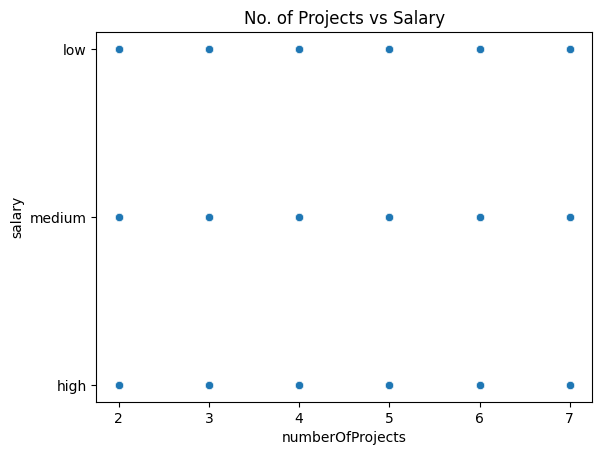

In [ ]:
# 11. Relationship Visualization
# No. of projects vs Salary
sns.scatterplot(data=data, x='numberOfProjects', y='salary')
plt.title('No. of Projects vs Salary')
plt.show()


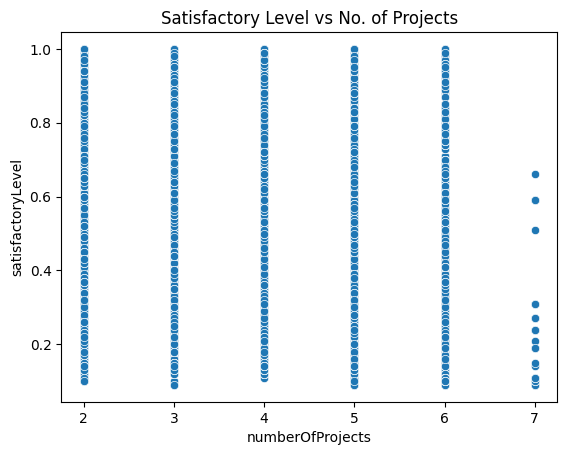

In [ ]:
# Satisfactory level vs No. of Projects
sns.scatterplot(data=data, x='numberOfProjects', y='satisfactoryLevel')
plt.title('Satisfactory Level vs No. of Projects')
plt.show()

Text(0.5, 1.0, 'No. of Projects vs Left')

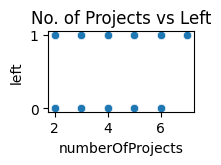

In [ ]:
# No. of projects vs Left
plt.subplot(4, 3, 2)
sns.scatterplot(data=data, x='numberOfProjects', y='left')
plt.title('No. of Projects vs Left')

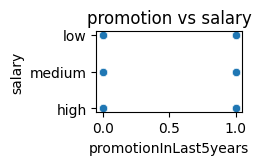

In [ ]:
# Promotion vs Salary
plt.subplot(4, 3, 4)
sns.scatterplot(data=data, x='promotionInLast5years', y='salary')
plt.title('promotion vs salary')
plt.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'sales'),
  Text(1, 0, 'accounting'),
  Text(2, 0, 'hr'),
  Text(3, 0, 'technical'),
  Text(4, 0, 'support'),
  Text(5, 0, 'IT'),
  Text(6, 0, 'product_mng'),
  Text(7, 0, 'marketing'),
  Text(8, 0, 'management'),
  Text(9, 0, 'RandD')])

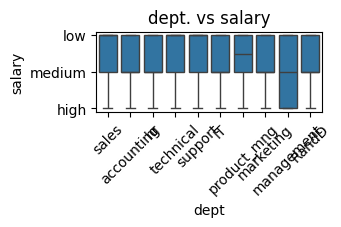

In [ ]:
# Dept. vs Salary
plt.subplot(4, 2, 5)
sns.boxplot(data=data, x='dept', y='salary')
plt.title('dept. vs salary')
plt.xticks(rotation=45)

Text(0.5, 1.0, 'Average Monthly Hours vs Satisfactory Level')

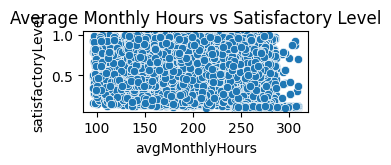

In [ ]:
# Average Monthly Hours vs Satisfactory Level
plt.subplot(4, 2, 6)
sns.scatterplot(data=data, x='avgMonthlyHours', y='satisfactoryLevel')
plt.title('Average Monthly Hours vs Satisfactory Level')

Text(0.5, 1.0, 'Satisfaction Level vs Left')

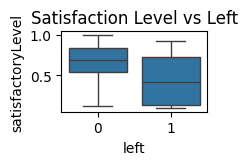

In [ ]:
# Satisfactory Level vs Left
plt.subplot(4, 3, 7)
sns.boxplot(data=data, x='left', y='satisfactoryLevel')
plt.title('Satisfaction Level vs Left')


Text(0.5, 1.0, 'Satisfaction Level vs Salary')

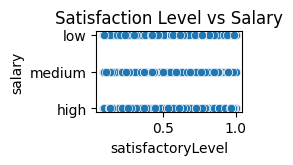

In [ ]:
# Satisfactory Level vs Salary
plt.subplot(4, 3, 8)
sns.scatterplot(data=data, x='satisfactoryLevel', y='salary')
plt.title('Satisfaction Level vs Salary')


Text(0.5, 1.0, 'Promotion vs Left')

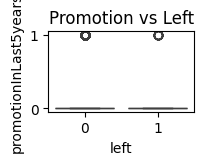

In [ ]:
# Promotion vs Left
plt.subplot(4, 3, 9)
sns.boxplot(data=data, x='left', y='promotionInLast5years')
plt.title('Promotion vs Left')

Text(0.5, 1.0, 'No. of Projects vs Promotion in 5 Years')

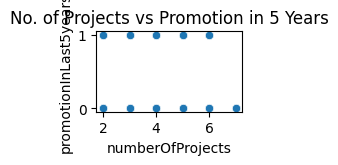

In [ ]:
plt.subplot(4, 3, 10)
sns.scatterplot(data=data, x='numberOfProjects', y='promotionInLast5years')
plt.title('No. of Projects vs Promotion in 5 Years')


Text(0.5, 1.0, 'Left vs Salary')

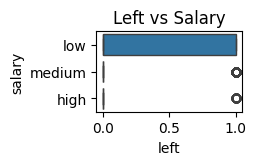

In [ ]:
# Left vs Salary
plt.subplot(4, 3, 11)
sns.boxplot(data=data, x='left', y='salary')
plt.title('Left vs Salary')

Text(0.5, 1.0, 'Work Accident vs Left')

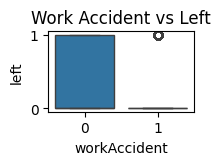

In [ ]:

plt.subplot(4, 3, 12)
sns.boxplot(data=data, x='workAccident', y='left')
plt.title('Work Accident vs Left')


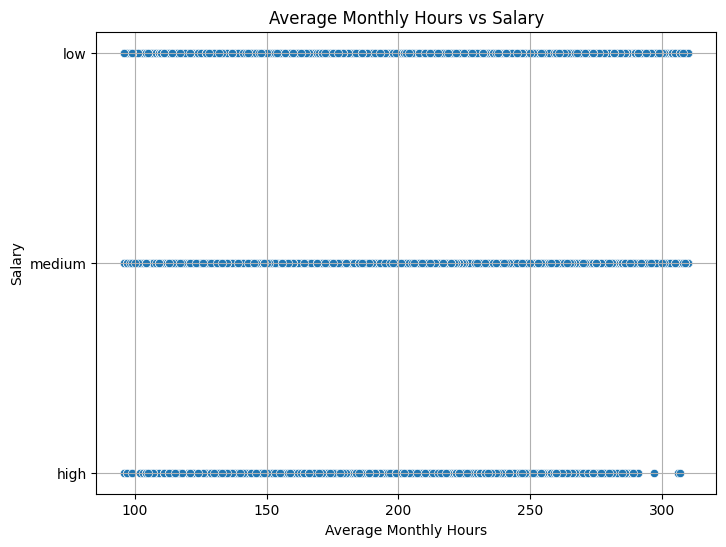

In [ ]:
# Visualize Average Monthly Hours vs Salary
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='avgMonthlyHours', y='salary')
plt.title('Average Monthly Hours vs Salary')
plt.xlabel('Average Monthly Hours')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

In [ ]:
le2 = LabelEncoder()
data["salary"]  = le2.fit_transform(data["salary"])
data["dept"]  = le2.fit_transform(data['dept'])

In [ ]:
# 13. Choose appropriate variables in x and y
X = data.drop(['left'], axis=1)
y = data['left']

In [ ]:
# 14. Use 75% for training and 25% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [ ]:
# 15. Use logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# 16. Confusion matrix
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


Confusion Matrix:
[[2668  170]
 [ 678  234]]


In [ ]:
# 17. Classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.94      0.86      2838
           1       0.58      0.26      0.36       912

    accuracy                           0.77      3750
   macro avg       0.69      0.60      0.61      3750
weighted avg       0.74      0.77      0.74      3750



In [ ]:
# 18. Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy Score: {accuracy}')

Accuracy Score: 0.7738666666666667
